In [1]:
import pandas as pd
import numpy as np
import matplotlib
import os

In [2]:
if not os.path.isfile('data.csv'):
    data = open('data.csv', mode='w')
    
    row = list()
    files=['data_folder/combined_data_2.txt']
    for file in files:
        print("Reading ratings from {}...".format(file))
        with open(file) as f:
            for line in f: 
                del row[:]
                line = line.strip()
                if line.endswith(':'):
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
    data.close()

Reading ratings from data_folder/combined_data_2.txt...


In [3]:
df = pd.read_csv('data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
df.sort_values(by='date', inplace=True)

In [4]:
df

,movie,user,rating,date
6465113,5571,510180,4,1999-11-11
21262258,8079,510180,2,1999-11-11
13151644,6615,510180,5,1999-11-11
24047847,8651,510180,2,1999-11-11
22463125,8357,510180,4,1999-11-11
...,...,...,...,...
4430172,5252,2118461,4,2005-12-31
18229377,7509,1946519,3,2005-12-31
1750284,4799,1780358,3,2005-12-31
24333700,8740,23421,4,2005-12-31


In [5]:
print("Starting...")
df['year'] = pd.to_datetime(df['date']).dt.year
print("Finishing Year...")
df['month'] = pd.to_datetime(df['date']).dt.month
print("Finishing Month...")
df['day'] = pd.to_datetime(df['date']).dt.month
print("Done")

Starting...
Finishing Year...
Finishing Month...
Done


In [6]:
df = df.drop(columns=["date"])
df

,movie,user,rating,year,month,day
6465113,5571,510180,4,1999,11,11
21262258,8079,510180,2,1999,11,11
13151644,6615,510180,5,1999,11,11
24047847,8651,510180,2,1999,11,11
22463125,8357,510180,4,1999,11,11
...,...,...,...,...,...,...
4430172,5252,2118461,4,2005,12,12
18229377,7509,1946519,3,2005,12,12
1750284,4799,1780358,3,2005,12,12
24333700,8740,23421,4,2005,12,12


In [7]:
df_small = df.sample(100000)

In [8]:
y = df_small['rating']
X = df_small.drop(columns=['rating'])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=30)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0   10  347  502   92]
 [   0   23  857 1122  186]
 [   0   30 2184 3029  581]
 [   2   45 2438 3426  676]
 [   0   19 1525 2337  569]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       951
           2       0.18      0.01      0.02      2188
           3       0.30      0.38      0.33      5824
           4       0.33      0.52      0.40      6587
           5       0.27      0.13      0.17      4450

    accuracy                           0.31     20000
   macro avg       0.22      0.21      0.19     20000
weighted avg       0.27      0.31      0.27     20000



In [14]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

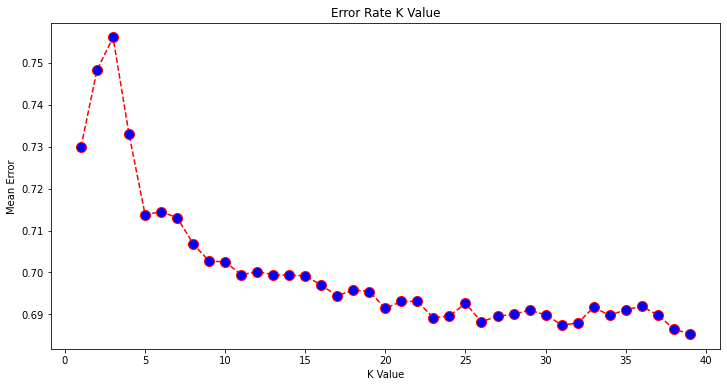

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [16]:
plt.show()